In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import date
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.externals import joblib
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.model_selection import cross_validate
from sklearn import datasets,model_selection,metrics,neural_network,preprocessing
from sklearn.utils import shuffle

from google.colab import drive

import warnings
warnings.filterwarnings("ignore")
import math
import re
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/

In [0]:
drive.mount('/content/drive')
project_dir = '/content/drive/My Drive/Colab Notebooks/Data Science-Project Future/pf-ds-thes-team2/'
users = pd.read_csv(project_dir + 'auxiliary_data/users_selected_features.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Train test split

X = users.drop(columns = 'plan')
y = users['plan']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2, stratify = y)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

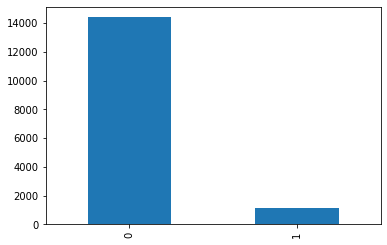

15544


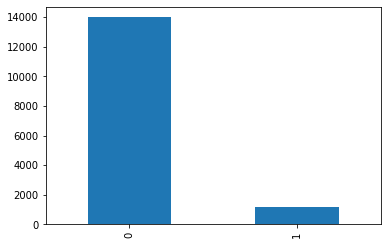

15139


In [0]:
# Undersampling TomekLinks

pd.Series(y).value_counts().plot(kind='bar')
plt.show()
print(len(y))

undersample = TomekLinks()
X, y = undersample.fit_resample(X, y)

pd.Series(y).value_counts().plot(kind='bar')
plt.show()
print(len(y))

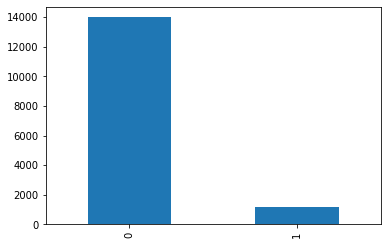

15139


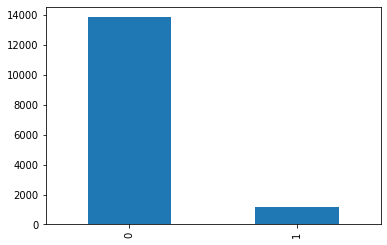

15005


In [0]:
# Undersampling NearMiss

pd.Series(y).value_counts().plot(kind='bar')
plt.show()
print(len(y))

undersample = NearMiss(sampling_strategy=0.083,  version=2)
X, y = undersample.fit_resample(X, y)

pd.Series(y).value_counts().plot(kind='bar')
plt.show()
print(len(y))

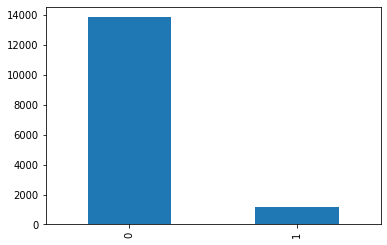

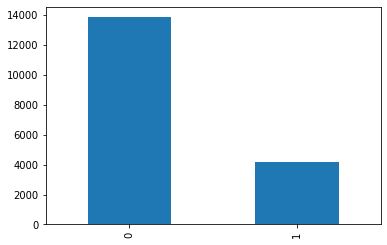

In [0]:
# Oversampling SMOTE

pd.Series(y).value_counts().plot(kind='bar')
plt.show()

sampler = SMOTE(sampling_strategy=0.3, random_state = 2)
#sampler = BorderlineSMOTE(sampling_strategy=0.3, random_state = 2)
X, y = sampler.fit_sample(X, y)

pd.Series(y).value_counts().plot(kind='bar')
plt.show()

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
models = [
          ('model',neural_network.MLPClassifier(hidden_layer_sizes=(100,100,100),solver='lbfgs',activation='relu', max_iter=100, tol=0.00001, random_state=2)),
          ('rf',RandomForestClassifier(n_estimators = 1000, class_weight='balanced', random_state = 42)),
          ('gb', GradientBoostingClassifier(random_state=0))
          ]

ensemble = VotingClassifier(estimators=models, voting='soft')

X, y = shuffle(X, y, random_state=0)
scoring = ['f1_macro']

scores = cross_validate(ensemble, X, y, scoring=scoring, cv=10, return_train_score=False)

print(scores)
print(scores['test_f1_macro'].mean())

{'fit_time': array([41.95462847, 41.54147172, 41.85670543, 41.49183321, 40.55452204,
       41.63333392, 41.15941262, 41.17831945, 41.6677103 , 41.4324491 ]), 'score_time': array([0.44158888, 0.44635153, 0.44811249, 0.52253914, 0.46085429,
       0.45134211, 0.45178556, 0.45163226, 0.44469714, 0.44978023]), 'test_f1_macro': array([0.84019936, 0.85194468, 0.84315074, 0.82718164, 0.83620901,
       0.83300977, 0.83500081, 0.83196256, 0.82605017, 0.82992426])}
0.8354633014297141


In [0]:
ensemble.fit(X, y)
joblib.dump(ensemble, project_dir + 'auxiliary_data/ensemble_classifier.pkl')

In [0]:
pred = ensemble.predict(X)
f1_score(y, pred, average='macro')